In [1]:
import pyWitness
from matplotlib.pyplot import *
import numpy

pyWitness v1.0 : Authorship - https://lmickes.github.io/pyWitness/authorship.html
pyWitness      : Runtime warnings are suppressed
pyWitness      : to reinstate (import warnings; warnings.simplefilter("") 


# Tutorial

## Checking and exploring loaded data

In [2]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


In [3]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.checkData()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


In [4]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.columnValues("responseTime")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
DataRaw.columnValues>           : responseTime [  1159   1296   1326   1826   1891   2008   2044   2124   2242   2482
   2499   2555   2570   2590   2672   2700   2720   2733   2739   2764
   2816   2818   2837   2862   2882   2919   2921   2933   2938   2948
   3032   3049   3078   3080   3096   3140   3169   3180   3199   3229
   3234   3240   3265   3271   3275   3280   3288   3290   3320   3343
   3352   3361   3371   3373   3374   3381   3393   3398   3406   3408
   3417   3445   3465   3479   3503   3504   3509   3521   3528   3551
 

In [5]:
import pyWitness
dr = pyWitness.DataRaw("test1.xlsx","test1")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


## Processing raw experimental data

In [6]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


In [7]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printPivot()
dp.printRates()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
                           confidence                                         \
confidence                        0    10   20   30    40    50    60    70    
targetLineup  responseType                                                     
targetAbsent  fillerId            2.0  7.0  5.0  8.0  10.0  20.0  26.0  20.0   
              rejectId            2.0  5.0  5.0  6.0   9.0  24.0  35.0  56.0   
targetPresent fillerId            0.0  0.0  2.0  3.0   5.0   6.0   5.0  10.0   
              rejectId            3.0  1.0  0.0  6.0  10.0  20.0 

In [8]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printDescriptiveStats()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
Number of lineups 890.0
Number of target-absent lineups 443.0
Number of target-present lineups 447.0
Correct ID rate 0.6196868008948546
False ID rate 0.0474040632054176
dPrime 1.9752208100241062
pAUC 0.02066155955774986


## Plotting ROC curves

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


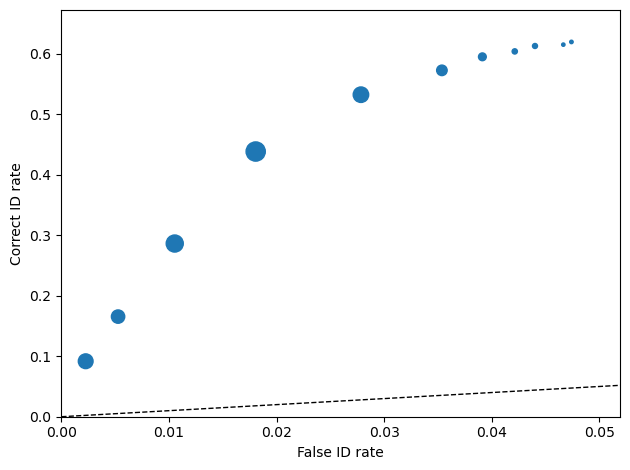

In [9]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotROC()

## Plotting CAC curves

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


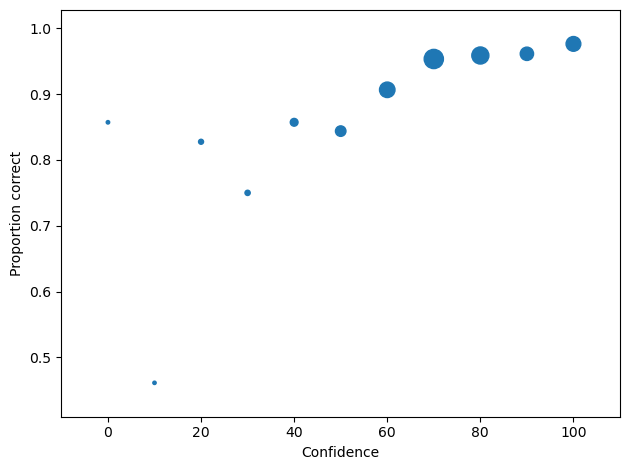

In [10]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotCAC()

## Collapsing the categorical data

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


(0.5, 1.0)

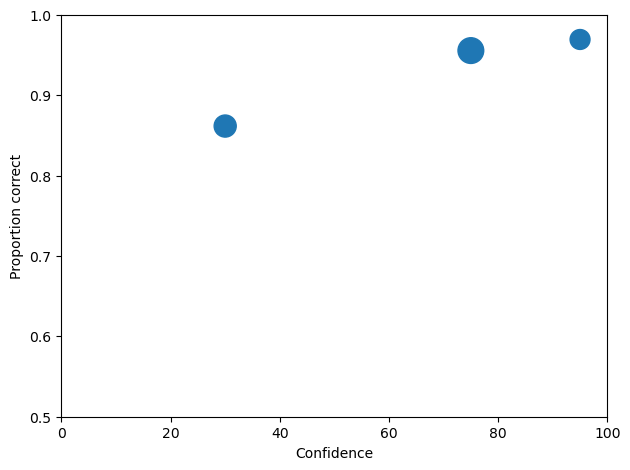

In [11]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseCategoricalData(column='confidence',
                           map={0: 30, 10: 30, 20: 30, 30: 30, 40: 30, 50: 30, 60: 30,
                                70: 75, 80: 75,
                                90: 95, 100: 95})
dp = dr.process()
dp.plotCAC()

#######
xlim(0,100)
ylim(0.50,1.0)

## Collapsing (binning) continuous data

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


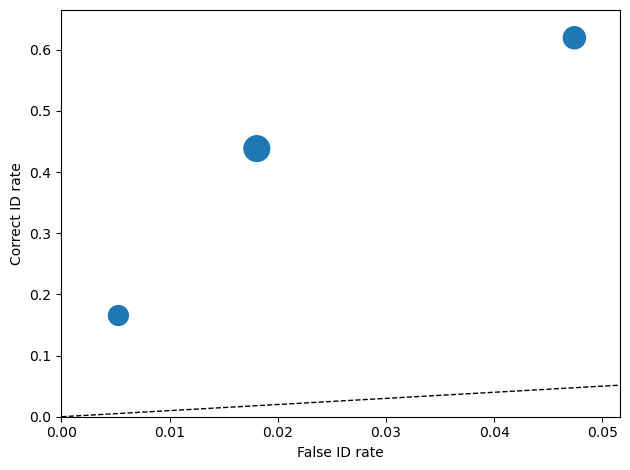

In [12]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotROC()

## Calculating pAUC and performing statistical tests

In [13]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
print(dp.pAUC)

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
0.020750138845233933


## Plotting RAC curves

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


(0.5, 1.0)

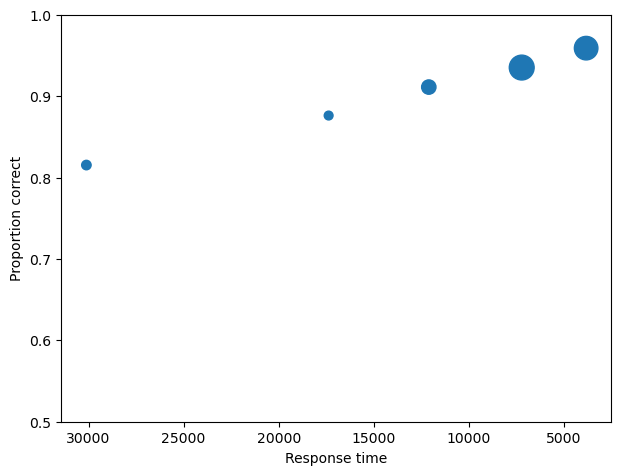

In [14]:
import pyWitness
drRAC = pyWitness.DataRaw("test1.csv")
drRAC.collapseContinuousData(column="responseTime",
                    bins=[0, 5000, 10000, 15000, 20000, 99999],
                        labels=[1, 2, 3, 4, 5])
dpRAC = drRAC.process(reverseConfidence=True,dependentVariable="responseTime")
dpRAC.plotCAC()
import matplotlib as _plt
xlabel("Response time")
ylim(.50,1.0)
#savefig("test1RAC.png")
#savefig("test1RAC.pdf")

## Fitting signal detection-based models to data

In [15]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       4.281474250000002
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


In [16]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
ModelFit.printParameters>  lureMean 0.000 (free)
ModelFit.printParameters>  lureSigma 1.000 (free)
ModelFit.printParameters>  targetMean 1.000 (free)
ModelFit.printParameters>  targetSigma 1.000 (free)
ModelFit.printParameters>  lureBetweenSigma 0.000 (free)
ModelFit.printParameters>  targetBetweenSigma 0.000 (free)
ModelFit.printParameters>  c1 1.000 (free)
ModelFit.printParameters>  c2 1.500 (free)
ModelFit.printParameters>  c3 2.000 (free)


In [17]:
mf.setEqualVariance()
mf.printParameters()

ModelFit.printParameters>  lureMean 0.000 (fixed)
ModelFit.printParameters>  lureSigma 1.000 (fixed targetSigma)
ModelFit.printParameters>  targetMean 1.000 (free)
ModelFit.printParameters>  targetSigma 1.000 (fixed)
ModelFit.printParameters>  lureBetweenSigma 0.300 (fixed targetBetweenSigma)
ModelFit.printParameters>  targetBetweenSigma 0.300 (free)
ModelFit.printParameters>  c1 1.000 (free)
ModelFit.printParameters>  c2 1.500 (free)
ModelFit.printParameters>  c3 2.000 (free)


In [18]:
mf.fit()
mf.printParameters()

fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.9365810000000003
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267
ModelFit.printParameters>  lureMean 0.000 (fixed)
ModelFit.printParameters>  lureSigma 1.000 (fixed targetSigma)
ModelFit.printParameters>  targetMean 1.798 (free)
ModelFit.printParameters>  targetSigma 1.000 (fixed)
ModelFit.printParameters>  lureBetweenSigma 0.605 (fixed targetBetweenSigma)
ModelFit.printParameters>  targetBetweenSigma 0.605 (free)
ModelFit.printParameters>  c1 1.402 (free)
ModelFit.printParameters>  c2 1.935 (free)
ModelFit.printParameters>  c3 2.677 (free)


In [19]:
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column="confidence")
dp = dr.process()

mf_io = pyWitness.ModelFitIndependentObservation(dp)
mf_br = pyWitness.ModelFitBestRest(dp)
mf_en = pyWitness.ModelFitEnsemble(dp)
mf_in = pyWitness.ModelFitIntegration(dp)

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


## Setting initial fit parameters

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


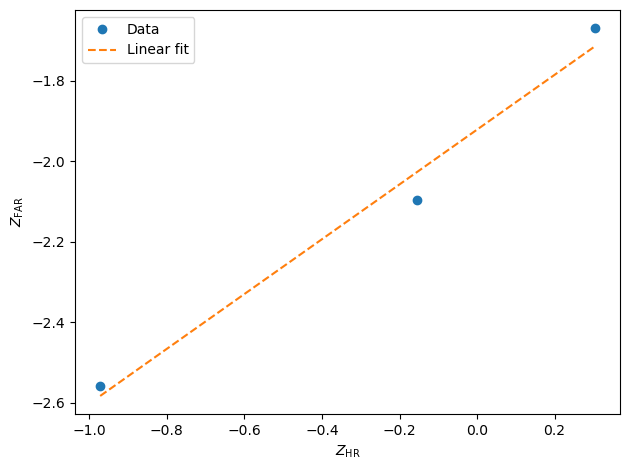

In [20]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotHitVsFalseAlarmRate()
savefig('HvFA.png')

In [21]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
ModelFit.printParameters>  lureMean 0.000 (free)
ModelFit.printParameters>  lureSigma 1.000 (free)
ModelFit.printParameters>  targetMean 1.000 (free)
ModelFit.printParameters>  targetSigma 1.000 (free)
ModelFit.printParameters>  lureBetweenSigma 0.000 (free)
ModelFit.printParameters>  targetBetweenSigma 0.000 (free)
ModelFit.printParameters>  c1 1.000 (free)
ModelFit.printParameters>  c2 1.500 (free)
ModelFit.printParameters>  c3 2.000 (free)


In [22]:
mf.setEqualVariance()
mf.setParameterEstimates()
mf.printParameters()

ModelFit.printParameters>  lureMean 0.000 (fixed)
ModelFit.printParameters>  lureSigma 1.000 (fixed targetSigma)
ModelFit.printParameters>  targetMean 1.922 (free)
ModelFit.printParameters>  targetSigma 1.000 (fixed)
ModelFit.printParameters>  lureBetweenSigma 0.300 (fixed targetBetweenSigma)
ModelFit.printParameters>  targetBetweenSigma 0.300 (free)
ModelFit.printParameters>  c1 1.715 (free)
ModelFit.printParameters>  c2 2.027 (free)
ModelFit.printParameters>  c3 2.582 (free)


In [23]:
mf.fit()
mf.printParameters()

fit iterations 189
fit status     Optimization terminated successfully.
fit time       3.1900712500000026
fit chi2       10.30041086023173
fit ndf        4
fit chi2/ndf   2.5751027150579326
fit p-value    0.035660204010113494
ModelFit.printParameters>  lureMean 0.000 (fixed)
ModelFit.printParameters>  lureSigma 1.000 (fixed targetSigma)
ModelFit.printParameters>  targetMean 1.798 (free)
ModelFit.printParameters>  targetSigma 1.000 (fixed)
ModelFit.printParameters>  lureBetweenSigma 0.605 (fixed targetBetweenSigma)
ModelFit.printParameters>  targetBetweenSigma 0.605 (free)
ModelFit.printParameters>  c1 1.402 (free)
ModelFit.printParameters>  c2 1.935 (free)
ModelFit.printParameters>  c3 2.677 (free)


## Plotting fit and models

In [24]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.8250110000000035
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.9033316670000033
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


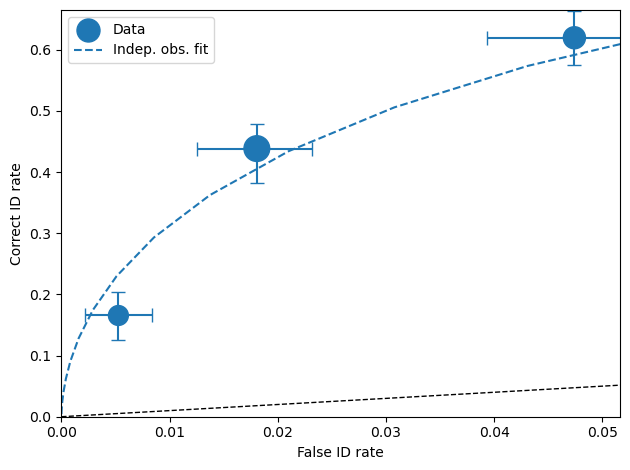

In [25]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.921862083999997
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


1.7976601843420954

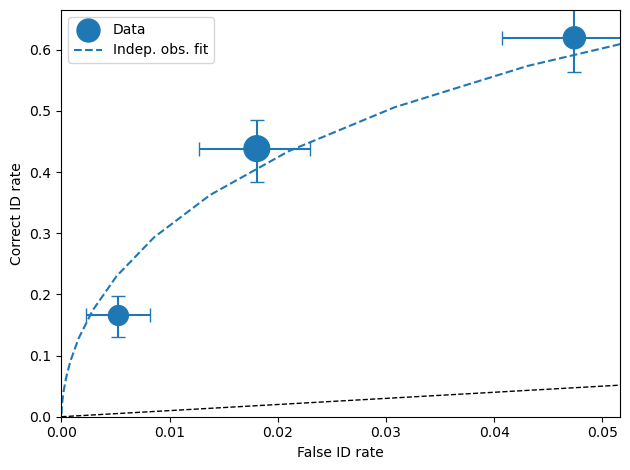

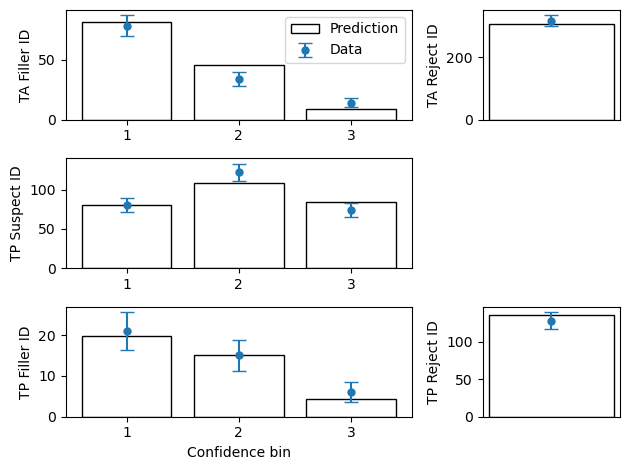

In [26]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()
mf.plotFit()
mf.d

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.974349334000003
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


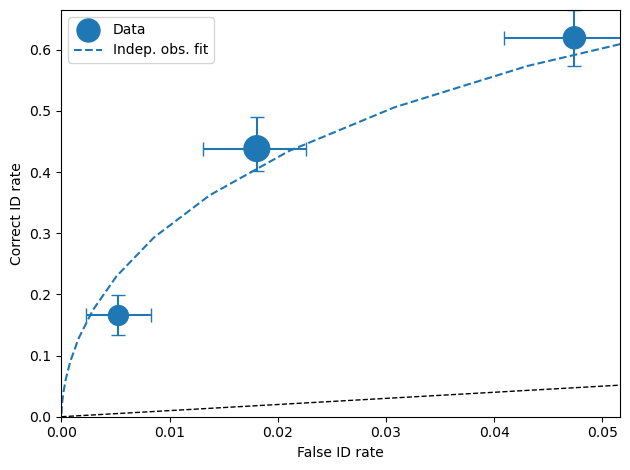

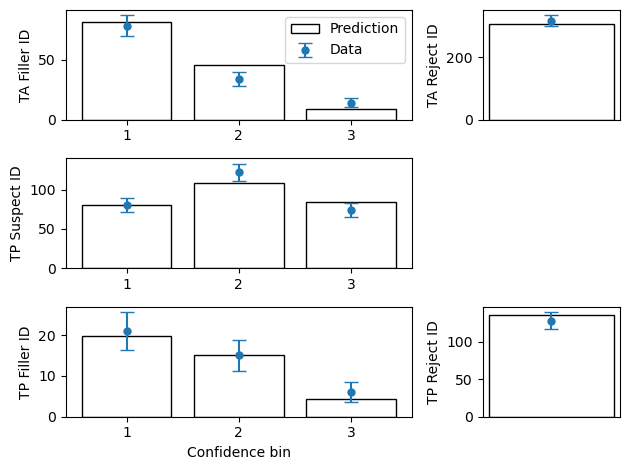

In [27]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()
mf.plotFit()

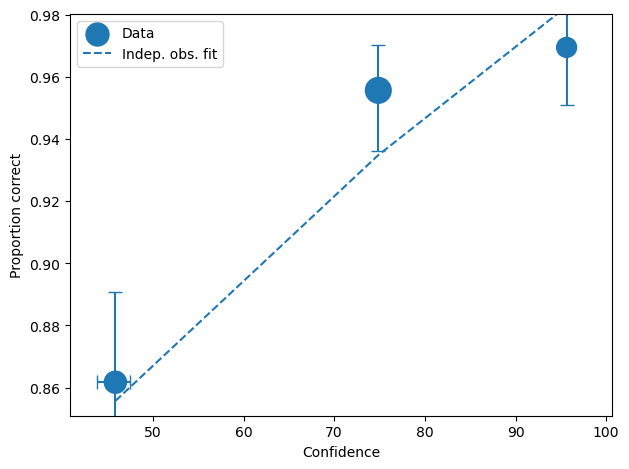

In [28]:
dp.plotCAC(label="Data")
mf.plotCAC(label="Indep. obs. fit")

import matplotlib.pyplot as _plt
_plt.legend()

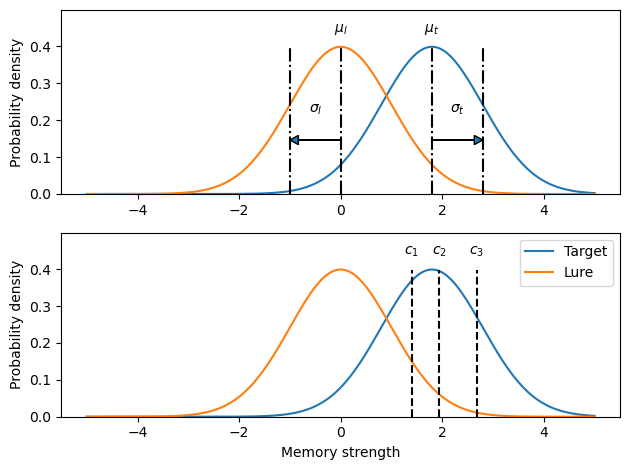

In [29]:
mf.plotModel()

In [30]:
mf.d

1.7976601843420954

## Writing results to file

In [33]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.writePivotExcel("test1_pivot.xlsx")
dp.writePivotCsv("test1_pivot.csv")
dp.writeRatesExcel("test1_rates.xlsx")
dp.writeRatesCsv("test1_rates.csv")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


# Advanced tutorial

## Bootstrapping uncertainties/confidence limits

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.printPivot()
dp.printRates()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotROC() 

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotCAC() 

## Loading raw data excel format

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.xlsx",excelSheet = "raw data")

## Transforming data into common format

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv",
                       dataMapping = {"lineupSize":"lineup_size",
                                      "targetLineup":"culprit_present",
                       "targetPresent":"present",
                       "targetAbsent":"absent",
                       "responseType":"id_type",
                       "suspectId":"suspect",
                       "fillerId":"filler",
                       "rejectId":"reject",
                       "confidence":"conf_level"})

## Processing data for two conditions

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)

## Statistical (pAUC) comparision between two conditions

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)
dpControl = dr.process("group","Control",pAUCLiberal=minRate)
dpControl.calculateConfidenceBootstrap(nBootstraps=200)
dpVerbal = dr.process("group","Verbal",pAUCLiberal=minRate)
dpVerbal.calculateConfidenceBootstrap(nBootstraps=200)
dpControl.comparePAUC(dpVerbal)

In [ ]:
dpControl.plotROC(label = "Control data", relativeFrequencyScale=400)
dpVerbal.plotROC(label = "Verbal data", relativeFrequencyScale=400)

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)

## Using instances of raw data, processed data and model fits

In [ ]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC()
dp2.plotCAC()

## Overlaying plots

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)
dp.printPivot() 

In [ ]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC(label = "11 bins")
dp2.plotCAC(label = "3 bins")

import matplotlib.pyplot as _plt
_plt.legend()
ylim(0.50,1.00)

## Generating data from signal detection model

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)
dr1.writeCsv("fileName.csv")
dr1.writeExcel("fileName.xlsx")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

# Need to process the synthetic data
dp1 = dr1.process()

# calculate uncertainties using bootstrap
dp.calculateConfidenceBootstrap()
dp1.calculateConfidenceBootstrap()

# plot ROCs
dp.plotROC(label="Experimental data")
dp1.plotROC(label="Simulated data")
mf.plotROC(label="Model fit")

import matplotlib.pyplot as _plt
legend()

## Power analysis

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=False)
mf.setEqualVariance()
mf.fit()

for nGen in numpy.linspace(500, 5000, 9+1) :
    drSimulated = mf.generateRawData(nGenParticipants = nGen)
    dpSimulated = drSimulated.process()
    dpSimulated.calculateConfidenceBootstrap(nBootstraps=2000)
    print(nGen, dpSimulated.liberalTargetAbsentSuspectId,dpSimulated.pAUC, dpSimulated.pAUC_low, dpSimulated.pAUC_high)

In [ ]:
#boogert - where'd this come from?
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column="confidence", bins=[-1, 60, 80, 100], labels=[1, 2, 3])
dp = dr.process()
dp.data_rates.columns.get_level_values(dp.dependentVariable)
dp.data_pivot.loc['targetAbsent' ,'fillerId']
list(dp.data_pivot.loc['targetAbsent', 'fillerId'].axes[0].droplevel())